# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('homeprices.csv')
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


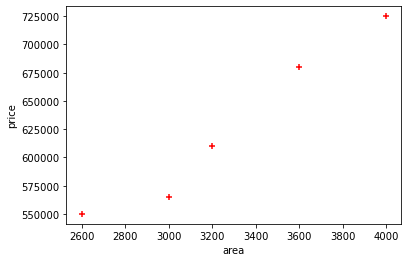

In [4]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
new_df=df.drop('price',axis='columns')
new_df  

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
#CREATE LINEAR REGRESSION OBJECT
reg=linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [8]:
reg.predict([[3300]])

array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [11]:
3300*135.78767123+180616.43835616432

628715.7534151643

# Linear Regression with multiple variables

In [12]:
df=pd.read_csv('homeprice.csv')
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,565000
4,4000,5,8,760000
5,4100,6,8,810000


In [13]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [14]:
reg.predict([[3000,3,40]])

array([443597.97297297])

In [15]:
reg.coef_

array([  110.05067568,  9586.14864865, -6140.2027027 ])

In [16]:
reg.intercept_

330295.6081081082

In [17]:
110.05067568*3000+9586.14864865*3+-6140.2027027 *40+330295.6081081082

443597.9729860582

# Polynomial Regression

In [3]:
dataset=pd.read_csv('Position_Salaries.csv')

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
x=dataset.iloc[:,1:2].values

In [21]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
y=dataset.iloc[:,2:].values

In [23]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

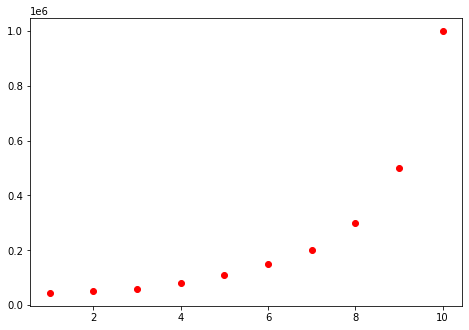

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [26]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

In [27]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

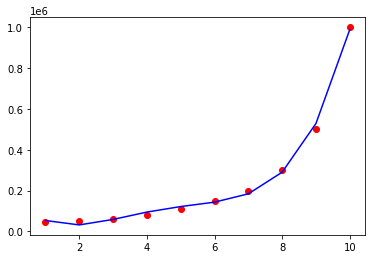

In [28]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(poly.fit_transform(x)),color='blue')

In [29]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [30]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

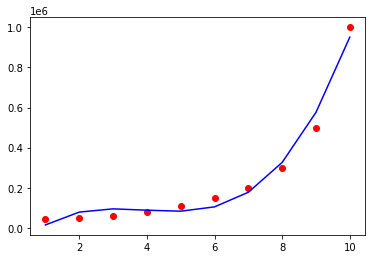

In [31]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(poly.fit_transform(x)),color='blue')

In [32]:
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

In [33]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

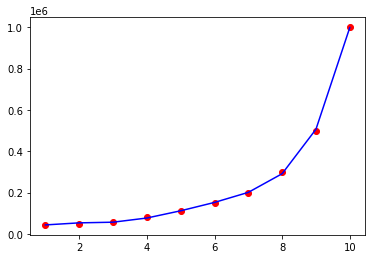

In [34]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(poly.fit_transform(x)),color='blue')

# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std

In [36]:
df2=pd.read_csv('housing.csv')
print(df2)

     0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0    0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1    0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2    0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3    0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4    0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   
..       ...    ...    ... ..     ...     ...    ...     ... ..    ...    ...   
500  0.06263    0.0  11.93  0   0.573   6.593   69.1  2.4786  1  273.0   21.0   
501  0.04527    0.0  11.93  0   0.573   6.120   76.7  2.2875  1  273.0   21.0   
502  0.06076    0.0  11.93  0   0.573   6.976   91.0  2.1675  1  273.0   21.0   
503  0.10959    0.0  11.93  0   0.573   6.794   89.3  2.3889  1  273.0   21.0   
504  0.04741    0.0  11.93  0   0.573   6.030   80.8  2.5050  1  273.0   21.0   

     396.90  4.98  24.00  


In [37]:
df2.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [38]:
data = df2.values
X, y = data[:, :-1], data[:, -1]

In [39]:
# define model
model = Ridge(alpha=1.0)

In [40]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [42]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.380 (0.342)


In [43]:
# fit model
model.fit(X, y)

Ridge()

In [44]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

In [45]:
# make a prediction
yhat = model.predict([row])

In [46]:
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.359


# Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

In [48]:
df2.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [49]:
data = df2.values
X, y = data[:, :-1], data[:, -1]

In [50]:
# define model
model = Lasso(alpha=1.0)

In [51]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [52]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [53]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.717 (0.385)


In [54]:
# fit model
model.fit(X, y)

Lasso()

In [55]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

In [56]:
# make a prediction
yhat = model.predict([row])

In [57]:
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 31.068
